In [2]:
"""
Tests for the postprocess module to verify simulation data is processed correctly.
"""

import os
import sys  # noqa
sys.path.append('./')  # noqa

import pytest
import numpy as np
# from src import postprocess as pp
import fdsreader as fds

# sample simulation data
# sim = fds.Simulation(
#     r"./tests/testing_data/Case_C064_fine_out_cat.smv")

sim = fds.Simulation(
    r"./testing_data/test_data/out_crop_circles_cat.smv")


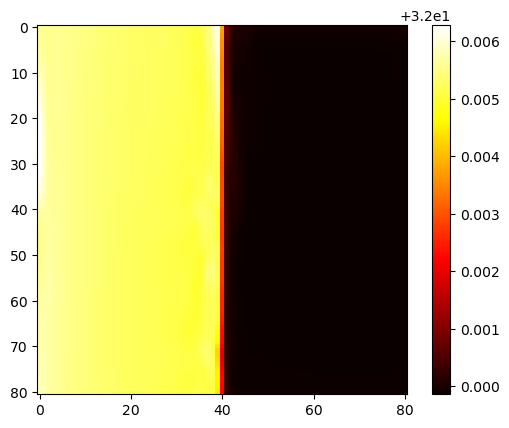

In [294]:
# VERIFICATION TESTING FROM FDSREADER

sim = fds.Simulation(
    r'./testing_data/3_meshes/Case_C064_fine_out_cat.smv')

quantity = 'WALL TEMPERATURE'

bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(quantity=quantity))

patch_data = bndf_data[1].data[3].data[100]

# print(f'Initial Boundary Data:\n{bndf_data}\n')

# # for all 3 meshes/patches
# for j in range(3):
#     patch_data = bndf_data[j].data[3].data
#     print(f'Patch dictionary for {j}:\n{bndf_data[j].data}')

#     df = bndf_data[1].data[3].data[330]

import matplotlib.pyplot as plt

plt.imshow(patch_data, cmap='hot')
plt.colorbar()

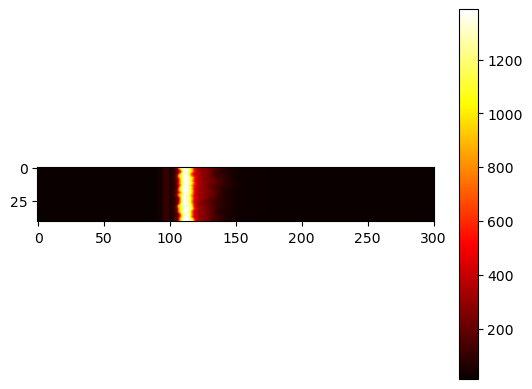

In [298]:
# OUR SIMULATION TESTING

sim = fds.Simulation(
    r'./testing_data/3_meshes/test_data/out_crop_circles_cat.smv')
    #tests/testing_data/3_meshes/test_data/out_crop_circles_cat_1_1.sf

quantity = 'WALL TEMPERATURE'

bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(quantity=quantity))

patch_data = bndf_data[1].data[3].data[100]

# print(f'Initial Boundary Data:\n{bndf_data}\n')

# # for all 3 meshes/patches
# for j in range(3):
#     patch_data = bndf_data[j].data[3].data
#     print(f'Patch dictionary for {j}:\n{bndf_data[j].data}')

#     df = bndf_data[1].data[3].data[330]

import matplotlib.pyplot as plt

plt.imshow(patch_data, cmap='hot')
plt.colorbar()

In [499]:
sim.steps["Step Size"]

array([4.35e-02, 4.35e-02, 4.35e-02, 4.35e-02, 4.35e-02, 4.35e-02,
       4.35e-02, 4.35e-02, 4.35e-02, 4.35e-02, 2.93e-02, 1.75e-02,
       1.36e-02, 1.36e-02, 1.18e-02, 1.03e-02, 1.03e-02, 1.03e-02,
       1.03e-02, 8.94e-03, 6.99e-03, 6.53e-03, 6.75e-03, 6.49e-03,
       6.38e-03, 7.25e-03, 7.01e-03, 6.82e-03, 6.64e-03, 5.86e-03,
       5.86e-03, 5.73e-03, 5.63e-03, 5.78e-03, 5.78e-03, 5.04e-03,
       5.19e-03, 5.02e-03, 5.07e-03, 5.07e-03, 3.96e-03, 4.08e-03,
       4.80e-03, 4.35e-03, 3.84e-03, 5.04e-03, 4.90e-03, 4.70e-03,
       4.94e-03, 5.27e-03, 5.06e-03, 4.77e-03, 4.64e-03, 4.89e-03,
       4.63e-03, 4.40e-03, 4.33e-03, 4.48e-03, 4.93e-03, 4.20e-03,
       3.61e-03, 3.92e-03, 4.04e-03, 4.04e-03, 3.92e-03, 3.86e-03,
       3.78e-03, 3.18e-03, 1.10e-03, 4.12e-03, 4.76e-03, 4.58e-03,
       5.17e-03, 5.05e-03, 1.09e-05])

In [497]:
len(sim.steps["Step Size"])

75

In [496]:
sim.steps["Step Size"][10] #- sim.steps["Step Size"][0
# sim.steps["Step Size"][1] #- sim.steps["Step Size"][0]

sim.steps["Step Size"][0] - sim.steps["Step Size"][10]

0.014199999999999997

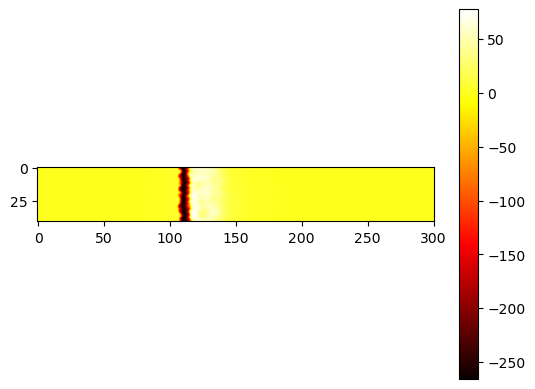

In [299]:


# OUR SIMULATION TESTING

sim = fds.Simulation(
    r'./testing_data/3_meshes/test_data/out_crop_circles_cat.smv')
    #tests/testing_data/3_meshes/test_data/out_crop_circles_cat_1_1.sf

quantity = 'TOTAL HEAT FLUX'

bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(quantity=quantity))

patch_data = bndf_data[1].data[3].data[100]

import matplotlib.pyplot as plt

plt.imshow(patch_data, cmap='hot')
plt.colorbar()

## STITCHING BOUNDARY DATA TOGETHER 

In [429]:

def stitch_mesh_data_to_array(list_of_meshes):
    """
    Takes data from an individual mesh and stitches it to a larger array.

    Step 1) Determine the size of the larger array.
    Step 2) Initialize the larger array.
    Step 3) Iterate over each mesh
        a) Determine the offset of the mesh in the larger array.
        b) Add the mesh to the larger array.

    Parameters
    ----------
    list_of_meshes : list[mesh]
        A list of mesh objects.

    Returns
    -------
    stitched_data : array-like object
        A 3D array-like object of data of a quantity. Dimensions of the array are (time, y, x).
    """
    # treat as 2D array and iterate over time
    # for each timestep, stitch the meshes together
    # iterate over each timestep and stitch these meshes together

    # for all timesteps
    for timestep in list_of_meshes[0, :, :]:
        # grab the 2D array at that timestep
        meshes = list_of_meshes[timestep, :, :]

    return np.vstack(list_of_meshes)

    data = []
    meshes = np.vstack(list_of_meshes)
    for row in range(len(meshes)):
        if row == 0:  # add the first row to the data
            data.append(list_of_meshes[row])
        # if the current row is not equal to the previous row, add it to the data
        if not np.array_equal(list_of_meshes[row], list_of_meshes[row-1]):
            data.append(list_of_meshes[row])

    stitched_data = np.array(data)

    return stitched_data



def get_bndf_data(sim, qty):
    mesh_data = []

    for mesh in sim.meshes:
        mesh_data.append(
            mesh.get_boundary_data(quantity=qty))

    # TODO: should this be capitalized?
    n_meshes = len(sim.meshes)

    # grabs all data and coordinates for each mesh
    bndf_data = []
    coords = []

    for mesh in range(n_meshes):
        bndf_data.append(mesh_data[mesh].data[n_meshes].data)
        coords.append(mesh_data[mesh].data[n_meshes].get_coordinates())

    # stitch the data together if there are multiple meshes
    # TODO: change this once we are ready to stitch MULTIPLE meshes together
    # TODO: we need to stitch the x coordinates together if there are multiple meshes
    # if n_meshes > 1:
    #     data = stitch_mesh_data_to_array(data)
    #     # TODO: this may not work for the coordinates depending on implementation
    #     coords = stitch_mesh_data_to_array(coords)

    return bndf_data, coords

In [430]:
sim = fds.Simulation(
    r'./testing_data/3_meshes/test_data/out_crop_circles_cat.smv')
    #tests/testing_data/3_meshes/test_data/out_crop_circles_cat_1_1.sf

quantity = 'TOTAL HEAT FLUX'


data, coords = get_bndf_data(sim, 'TOTAL HEAT FLUX')


In [434]:
testing = np.stack(data, axis=0)
testing.shape
data[0].shape

(337, 41, 301)

In [442]:
# chat's stitch

import numpy as np

# Assuming arr1, arr2, and arr3 are your three arrays of shape (337, 41, 301)
# Replace these with your actual arrays
np.random.seed(0)
arr1 = np.random.rand(337, 41, 301)
arr2 = np.random.rand(337, 41, 301)
arr3 = np.random.rand(337, 41, 301)

# Extract the middle dimension (41) from each array and concatenate along that dimension
result_array = np.concatenate([arr[:, :, :] for arr in [arr1, arr2, arr3]], axis=1)

# The resulting array will have shape (337, 123, 301)
print(result_array.shape)
len(np.unique(result_array[:,0,0]))

# result_array[:,0,0]


(337, 123, 301)


337

In [435]:
# Extract the middle dimension (41) from each array and concatenate along that dimension
result_array = np.concatenate([arr[:, :, :] for arr in [data[0], data[1], data[2]]], axis=1)

# The resulting array will have shape (337, 123, 301)
print(result_array.shape)


len(np.unique(result_array[:,0,0]))
len(np.unique(result_array[0,:,0]))
# len(np.unique(result_array[:,0,0]))



(337, 123, 301)


123

In [ ]:
# chat's remove duplicate rows

import numpy as np

# Assuming result_array is your array of shape (337, 123, 301)
# Replace this with your actual array
result_array = np.random.rand(337, 123, 301)

# Reshape the array to 2D (flatten along the second and third dimensions)
reshaped_array = result_array.reshape(result_array.shape[0], -1)

# Use numpy.unique to get unique rows
unique_rows, indices = np.unique(reshaped_array, axis=0, return_index=True)

# Reshape back to the original shape
result_array_no_duplicates = unique_rows.reshape(result_array.shape[0], -1, result_array.shape[2])

# The resulting array will have no duplicate rows
print(result_array_no_duplicates.shape)


In [403]:
# grab x data, stitch it  together, and add it to time and y data

# data [0] to [3] for the three meshes
data[0].shape 

# xdata
data[0][0,:,0].shape

(41,)

In [407]:
# Extract the middle dimension (41) from each array and concatenate along that dimension
result_array = np.concatenate([arr for arr in [data[0][0,:,0], data[1][0,:,0], data[2][0,:,0]]])
result_array.shape

(123,)

In [ ]:
C = np.concatenate((A, 
                    np.broadcast_to(np.array(B)[:, None, None], A.shape[:-1] + (1,))), 
                   axis = -1)

In [421]:
# adding the x data to the time and y data
print(data[0][:,0,:].all() == data[1][:,0,:].all() == data[2][:,0,:].all())
data[0][:,0,0].shape
stitched = np.concatenate((data[0][:,0,0], result_array, data[0][0,0,:]), axis=-1)
stitched.shape

True


ValueError: input operand has more dimensions than allowed by the axis remapping

In [366]:
len(data) # 3 for the 3 meshes

3

In [367]:
coords[0]["x"].shape 

(41,)

In [453]:
len(coords)

3

In [477]:
print(coords[0]["z"])
print(coords[1]["z"])
print(coords[2]["z"])

[0.]
[0.]
[0.]


In [476]:
# FOR COORDINATES
# Extract the middle dimension (41) from each array and concatenate along that dimension

x_coords = np.concatenate([arr for arr in [coords[0]["x"], coords[1]["x"], coords[2]["x"]]])

print(x_coords.shape)
print(coords[0]["x"].shape)
print(coords[0]["y"].shape)
print(coords[1]["y"].shape)

print(coords[0]["y"].all() == coords[1]["y"].all() == coords[2]["y"].all())
print(coords[0]["z"].all() == coords[1]["z"].all() == coords[2]["z"].all())
# concat x, y, and z coords
x_coords = np.concatenate((x_coords, coords[0]["y"], coords[0]["z"]))

new_coords = {"x": x_coords, "y": coords[0]["y"], "z": coords[0]["z"]}

# x_coords = np.vstack((x_coords, coords[0]["y"], coords[0]["z"]))

print(new_coords["x"].shape)
print(new_coords["y"].shape)
print(new_coords["z"].shape)

# x_coords = np.concatenate([arr[:, :, :] for arr in [coords[0], coords[1], coords[2]]], axis=1)



# result_array = np.concatenate([arr[:, :, :] for arr in [data[0], data[1], data[2]]], axis=1)

# # The resulting array will have shape (337, 123, 301)
# print(result_array.shape)


# len(np.unique(result_array[:,0,0]))
# len(np.unique(result_array[0,:,0]))
# # len(np.unique(result_array[:,0,0]))
# for i in [100, 200, 300] :
#     plt.imshow(result_array[i,:,:], cmap='hot')
#     plt.colorbar()
#     plt.show()

(123,)
(41,)
(301,)
(301,)
True
True
(425,)
(301,)
(1,)


In [448]:
data[0].shape

(337, 41, 301)

<hr>

## Stitched coords to get dx dy


In [534]:
new_coords["x"]

dx = []

for coord in range(len(new_coords["x"])):
    # print(coord)
    if coord == 0:
        continue
    dx.append(new_coords["x"][coord] - new_coords["x"][coord - 1])
# print(np.mean(dx))

df = pd.DataFrame(dx, columns=["dx"])
df.value_counts()
df.describe()
print(np.median(dx))

0.099999964


In [527]:
df

,dx
0,0.100000
1,0.100000
2,0.100000
3,0.100000
4,0.100000
...,...
419,0.099999
420,0.100000
421,0.099999
422,0.100000


In [529]:
df.loc[df['dx'] < 0]

,dx
122,-24.0
423,-12.0


In [531]:
print(new_coords["x"][122])
print(new_coords["x"][123])

6.0
-18.0


In [537]:
dy = new_coords["y"][1] - new_coords["y"][0]
round(dy, 5)

0.1

<hr>

(337, 123, 301)


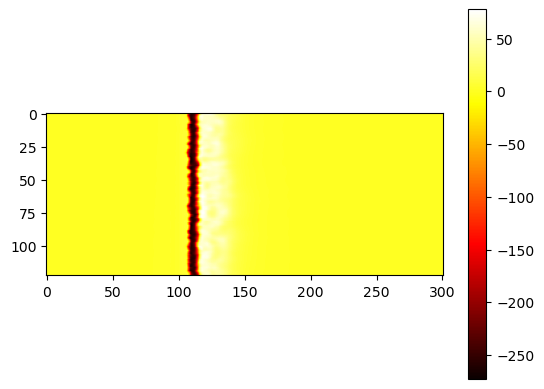

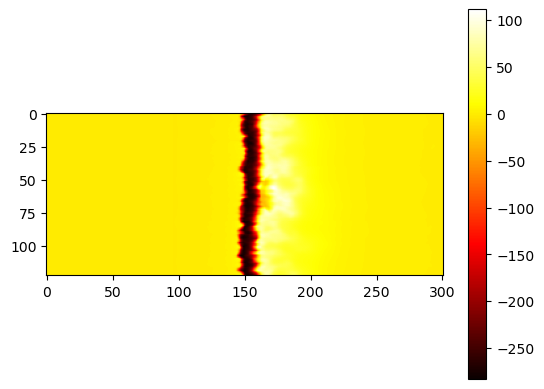

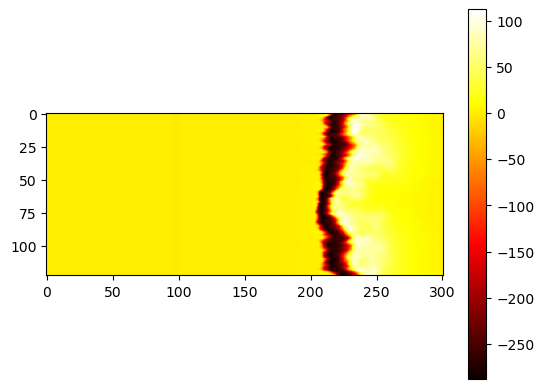

In [445]:
# Extract the middle dimension (41) from each array and concatenate along that dimension
result_array = np.concatenate([arr[:, :, :] for arr in [data[0], data[1], data[2]]], axis=1)

# The resulting array will have shape (337, 123, 301)
print(result_array.shape)


len(np.unique(result_array[:,0,0]))
len(np.unique(result_array[0,:,0]))
# len(np.unique(result_array[:,0,0]))
for i in [100, 200, 300] :
    plt.imshow(result_array[i,:,:], cmap='hot')
    plt.colorbar()
    plt.show()

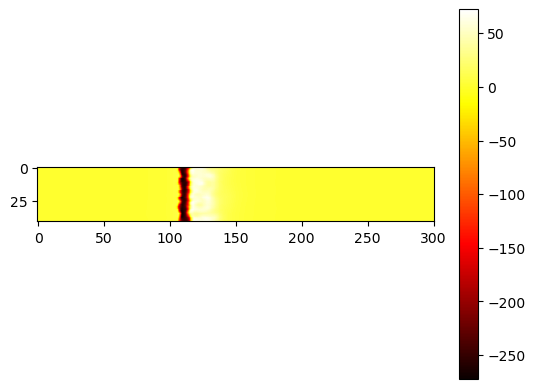

In [369]:
plt.imshow(data[0][100], cmap='hot')
plt.colorbar()

(337, 3, 41, 301)

In [334]:
# stitching them together
# for one timestep

# data for timestep 100 for ALL meshes
time_data = [data[0][100], data[1][100], data[2][100]]

all_data = []
for i in range(len(time_data)):
    all_data.append(np.vstack(data[i])) # add the data for mesh i to final data


In [336]:
all_data[0].shape

(337, 41, 301)

<HR>

In [14]:
len(sim.slices)

6

In [15]:
len(sim.meshes)

3

In [21]:
sim.slices[1]

Slice([2D] quantity=Quantity('HRRPUV'), cell_centered=True, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [0.20, 0.20]), extent_dirs=('x', 'y'), orientation=3)

In [29]:
data = []
coords = []
times = []

for slice in sim.slices:

    # Creates a global numpy ndarray from all subslices (of the slice)
    # xyz is the returned matching coordinate for each value on the generated grid (data).
    # can return large sparse arrays for some slices
    slice_data, slice_coords = slice.to_global(
        return_coordinates=True, masked=True)
    # times for each slice
    slice_times = slice.times

    data.append(slice_data)
    coords.append(slice_coords)
    times.append(slice_times)

In [41]:
np.array(times).shape

(6, 337)

In [43]:
np.array(coords) # coordinates for each slice

array([{'x': array([-6. , -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5. ,
              -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9,
              -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8,
              -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7,
              -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6,
              -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
               0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,
               1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,
               2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,
               3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
               5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ]), 'y': array([-18. , -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2,
              -17.1, -17. , -16.9, -1

In [31]:
len(data) # one for each slice

6

In [39]:
np.array(data[0]).shape # data for first slice

# times, x, y coordinates for first slice

(337, 121, 301)

In [36]:
data[0]

array([[[1.25112796, 1.25230682, 1.25206959, ..., 1.24726868,
         1.24745727, 1.24745727],
        [1.24966538, 1.24987435, 1.24923408, ..., 1.24842095,
         1.24851358, 1.24851358],
        [1.24858403, 1.24835134, 1.24809957, ..., 1.24799502,
         1.24674237, 1.24674237],
        ...,
        [1.24888468, 1.24847758, 1.24776912, ..., 1.24980235,
         1.25034642, 1.25034642],
        [1.24823368, 1.24799371, 1.24827874, ..., 1.24920726,
         1.24943888, 1.24943888],
        [1.24823368, 1.24799371, 1.24827874, ..., 1.24920726,
         1.24943888, 1.24943888]],

       [[1.26843417, 1.26966441, 1.27194059, ..., 1.24409485,
         1.24403512, 1.24403512],
        [1.26857567, 1.26901805, 1.26917171, ..., 1.24430287,
         1.24505246, 1.24505246],
        [1.26848459, 1.26816869, 1.26707792, ..., 1.24625063,
         1.2450732 , 1.2450732 ],
        ...,
        [1.26889241, 1.26888859, 1.26737261, ..., 1.24369121,
         1.24571013, 1.24571013],
        [1.2

In [37]:
sim.times

0.0
90.0


[0.0, 90.0]

In [18]:
bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(
        quantity="WALL TEMPERATURE"))
sim.meshes[0].get_boundary_data(quantity="WALL TEMPERATURE")

bndf_data = np.vstack(bndf_data)
bndf_data

array([[Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1)],
       [Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1)],
       [Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1)]],
      dtype=object)

In [19]:
bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(
        quantity="TEMPERATURE"))
sim.meshes[0].get_boundary_data(quantity="TEMPERATURE")

bndf_data = np.vstack(bndf_data)

StopIteration: 

<hr>

getting coordinates

In [9]:
import numpy as np

data = np.array(([0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
                [1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
                [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]))

row_coords = np.zeros(data.shape[0])

x_coords = []
y_coords = []

data.shape[0] # rows
data.shape[1] # columns


# grab the top-most array (x, y) locations where the data = 1
for column in range(data.shape[1]):  # for each column
    for row in range(data.shape[0]):  # for each row
        if data[row, column] == 1:
            x_coords.append(column)
            y_coords.append(row)
            break

print(x_coords)
print(y_coords)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 1, 1, 2, 2, 2, 1, 1, 1, 2]


In [11]:
data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]])

In [10]:
# convert the above to cartesian coordinates

# convert array (x, y) coordinates into cartesian coordinates
# x = u * (dx) + tx
# y = v * (dy) + ty

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0]
[-1 -1 -1  0  0  0 -1 -1 -1  0]


## FIXME above

<hr>

stitching mesh data

In [9]:
def stitch_mesh_data_to_array(list_of_meshes):
    """
    Takes data from an individual mesh and stitches it to a larger array.

    Step 1) Determine the size of the larger array.
    Step 2) Initialize the larger array.
    Step 3) Iterate over each mesh
        a) Determine the offset of the mesh in the larger array.
        b) Add the mesh to the larger array.

    Parameters
    ----------
    list_of_meshes : list[mesh]
        A list of mesh objects.

    Returns
    -------
    stitched_data : array-like object
        A 3D array-like object of data of a quantity. Dimensions of the array are (time, y, x).
    """
    # FIXME: The meshes or slice arrays may not be the same shape. How do we handle this? vstack will not work in this case.
    # determine the size of the stitched array

    # treat as 2D array and iterate over time
    # for each timestep, stitch the meshes together
    # iterate over each timestep and stitch these meshes together

    for timestep in list_of_meshes[0, :, :]:
        continue
    return np.vstack(list_of_meshes)



def get_bndf_data(sim, qty):
    """
    This function will take in a simulation file and return a 3D array-like object of
    the data for the given quantity. Dimensions of the array are (time, y, x).

    The data comes from the fdsreader bndf object.

    NOTE: It may be necessary to stitch together multiple meshes to get the full data.

    Parameters
    ----------
    sim : fdsreader.Simulation
        A simulation object.
    qty : string
        The name of the quantity to get data for.

    Returns
    -------
    data : array-like object
        A 3D array-like object of data of a quantity. Dimensions of the array are (time, y, x).
    """
    # get global boundary data arrays for each individual mesh
    data = []

    for mesh in sim.meshes:
        data.append(
            mesh.get_boundary_data(quantity=qty))

    # stitch the data together
    data = stitch_mesh_data_to_array(data)

    return data

In [150]:
for mesh in sim.meshes:
    # print(mesh.quantity)
    print(mesh.get_boundary_data(quantity="HRRPUA"))

Boundary(Quantity=Quantity('HRRPUA'), Patches=1)
Boundary(Quantity=Quantity('HRRPUA'), Patches=1)
Boundary(Quantity=Quantity('HRRPUA'), Patches=1)


In [151]:
# Mesh object to Boundary object

aa = []
for mesh in sim.meshes:
    aa.append(mesh.get_boundary_data(quantity="HRRPUA"))

print(aa) # returns a list of Boundary objects

print(aa[0].data) # returns a dict object of a Patch object

print(aa[0].n_t()) # number of timesteps in the boundary

print(aa[0].orientations)

print(aa[0].data[3]) # Patch object

# print(aa[0].data[3].data) # data for the patch

patch_data = aa[0].data[3].data
patch_data
patch_data.shape


[Boundary(Quantity=Quantity('HRRPUA'), Patches=1), Boundary(Quantity=Quantity('HRRPUA'), Patches=1), Boundary(Quantity=Quantity('HRRPUA'), Patches=1)]
{3: Patch(shape=(41, 301), orientation=3, extent=Extent([-6.00, -2.00] x [-18.00, 12.00] x [0.00, 0.00]))}
337
[3]
Patch(shape=(41, 301), orientation=3, extent=Extent([-6.00, -2.00] x [-18.00, 12.00] x [0.00, 0.00]))


(337, 41, 301)

## patch data

In [163]:
import pandas as pd

df = pd.DataFrame(patch_data[0]) # first timestep

df = pd.DataFrame(patch_data[150]) # 151st timestep


In [169]:
df.shape # x and y for the timestep

(41, 301)

In [190]:
print(df[(df > 0).any(axis=1)].shape)
df[(df > 0).any(axis=1)]

(0, 301)


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300


In [175]:
for i in range(0, 337):
    df = pd.DataFrame(patch_data[i])
    df = df[(df > 0).any(axis=1)]
    if df.shape[0] > 0:
        print(f'Data in timestep {i} has values over zero')

In [187]:
# for all 3 patches
for j in range(3):
    patch_data = aa[j].data[3].data
    print(f'Patch dictionary for {j}:\n{aa[j].data}')
    for i in range(0, 337):
        df = pd.DataFrame(patch_data[i])
        df = df[(df > 0).any(axis=1)]
        if df.shape[0] > 0:
            print(f'Data in timestep {i} has values over zero')

Patch dictionary for 0:
{3: Patch(shape=(41, 301), orientation=3, extent=Extent([-6.00, -2.00] x [-18.00, 12.00] x [0.00, 0.00]))}
Patch dictionary for 1:
{3: Patch(shape=(41, 301), orientation=3, extent=Extent([-2.00, 2.00] x [-18.00, 12.00] x [0.00, 0.00]))}
Patch dictionary for 2:
{3: Patch(shape=(41, 301), orientation=3, extent=Extent([2.00, 6.00] x [-18.00, 12.00] x [0.00, 0.00]))}


## loops above for set quantity

In [254]:
len(sim.meshes)

3

In [280]:
# are all coordinates the same for each mesh? (all y and z coordinates are the same, x coordinates differ)

    # coords = [data[0].data[n_meshes].get_coordinates()]
quantity = "TOTAL HEAT FLUX"


bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(quantity=quantity))

all_coords = []

# for all 3 meshes/patches
for j in range(3):
    all_coords.append(bndf_data[j].data[3].get_coordinates())

print(all_coords[0]["x"].all() == all_coords[1]["x"].all() == all_coords[2]["x"].all())
print(all_coords[0]["y"].all() == all_coords[1]["y"].all() == all_coords[2]["y"].all())
print(all_coords[0]["z"].all() == all_coords[1]["z"].all() == all_coords[2]["z"].all())



False
True
True


In [253]:
quantity = "TOTAL HEAT FLUX"


bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(quantity=quantity))

print(f'Initial Boundary Data:\n{bndf_data}\n')

# for all 3 meshes/patches
for j in range(3):
    patch_data = bndf_data[j].data[3].data
    print(f'Patch dictionary for {j}:\n{bndf_data[j].data}')
    for i in range(0, 337):
        df = pd.DataFrame(patch_data[i])
        if df.shape != (41, 301):
            print(f'Shape of dataframe for timestep {i}:\n{df.shape}\n')
        df_all_0 = (df == 0).all().all()
        df_w_values = (df > 0).all().any()
        df_w_neg_values = (df < 0).all().any()

        if df_all_0:
            # print(f'All data in mesh{j} and timestep {i} are zero')
            pass
        if df_w_values:
            print(f'Data in mesh {j} and timestep {i} have values over zero')
            # locate rows with values
            df = df[(df > 0).any(axis=1)]
            print(df.shape)
        if df_w_neg_values:
        

            #(slice_df == 0).all().all()

Initial Boundary Data:
[Boundary(Quantity=Quantity('TOTAL HEAT FLUX'), Patches=1), Boundary(Quantity=Quantity('TOTAL HEAT FLUX'), Patches=1), Boundary(Quantity=Quantity('TOTAL HEAT FLUX'), Patches=1)]

Patch dictionary for 0:
{3: Patch(shape=(41, 301), orientation=3, extent=Extent([-6.00, -2.00] x [-18.00, 12.00] x [0.00, 0.00]))}
Patch dictionary for 1:
{3: Patch(shape=(41, 301), orientation=3, extent=Extent([-2.00, 2.00] x [-18.00, 12.00] x [0.00, 0.00]))}
Patch dictionary for 2:
{3: Patch(shape=(41, 301), orientation=3, extent=Extent([2.00, 6.00] x [-18.00, 12.00] x [0.00, 0.00]))}


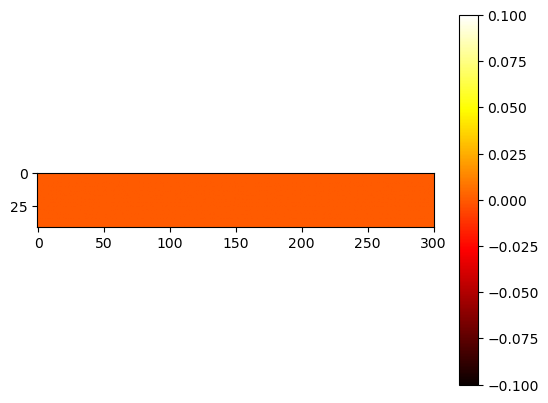

In [290]:
df = bndf_data[1].data[3].data[330]

import matplotlib.pyplot as plt

plt.imshow(df, cmap='hot')
plt.colorbar()

<hr>

In [286]:
obs = sim.obstructions
obs

ObstructionCollection([])

## Testing slice data

In [270]:
data = []
coords = []
times = []

for slice in sim.slices:
    if str(slice.quantity.name) == qty:

        # Creates a global numpy ndarray from all subslices (of the slice)
        # xyz is the returned matching coordinate for each value on the generated grid (data).
        # can return large sparse arrays for some slices
        slice_data, slice_coords = slice.to_global(
            return_coordinates=True, masked=True)
        # times for each slice
        slice_times = slice.times

        data.append(slice_data)
        coords.append(slice_coords)
        times.append(slice_times)
        # break  # this break only grabs the first quantity


In [271]:
for sllice in sim.slices:
    print(sllice)

Slice([2D] quantity=Quantity('VELOCITY'), cell_centered=False, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [1.00, 1.00]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('HRRPUV'), cell_centered=True, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [0.20, 0.20]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('HRRPUV'), cell_centered=True, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [1.10, 1.10]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('VELOCITY'), cell_centered=False, extent=Extent([0.00, 0.00] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)
Slice([2D] quantity=Quantity('TEMPERATURE'), cell_centered=True, extent=Extent([0.10, 0.10] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)
Slice([2D] quantity=Quantity('INTEGRATED INTENSITY'), cell_centered=True, extent=Extent([0.10, 0.10] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)


In [272]:
print(data[0].shape)
print(data[1].shape)
len(data)

(337, 120, 300)
(337, 120, 300)


2

In [273]:
slice_df[(slice_df == 0).all(axis=1)].shape > (0, 0)

True

In [274]:
(slice_df == 0).all().all()

False

In [275]:
slice_df = pd.DataFrame(data[0][200]) # 200th timestep of first slice

In [276]:
slice_df.head()
slice_df.shape
slice_df[(slice_df > 0).any(axis=1)]


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:

# for all 2 slices
for j in range(2):

    # print(f'Patch dictionary for {j}:\n{aa[j].data}')
    for i in range(0, 337):
        slice_df = pd.DataFrame(data[j][i]) # slice j, timestep i
        
        if slice_df.shape != (120, 300):
            print(f'Shape of dataframe for timestep {i}:\n{slice_df.shape}\n')
        df_w_values = (slice_df > 0).all().any()#slice_df[(slice_df > 0).any(axis=1)]
        df_all_0 = (slice_df == 0).all().all() #all_zeros = (df == 0).all().all()

        if df_w_values:#df_w_values.shape > (0, 0): 
            # print(f'Data in slice {j} and timestep {i} have values over zero')
            pass
        if df_all_0:
            print(f'All values are zero in slice {j} and timestep {i}')

All values are zero in slice 0 and timestep 0
All values are zero in slice 1 and timestep 0
All values are zero in slice 1 and timestep 1
All values are zero in slice 1 and timestep 2
All values are zero in slice 1 and timestep 3
All values are zero in slice 1 and timestep 4
All values are zero in slice 1 and timestep 5
All values are zero in slice 1 and timestep 6
All values are zero in slice 1 and timestep 7
All values are zero in slice 1 and timestep 8
All values are zero in slice 1 and timestep 9
All values are zero in slice 1 and timestep 10
All values are zero in slice 1 and timestep 11
All values are zero in slice 1 and timestep 12


In [278]:
# all times are the same
times[0].all() == times[1].all()

True

In [279]:
# all coordinates are the same
print(coords[0]["x"].all() == coords[1]["x"].all())
print(coords[0]["y"].all() == coords[1]["y"].all())
print(coords[0]["z"].all() == coords[1]["z"].all())

True
True
True


<hr>

In [152]:
patch_data.shape
patch_data[0].all() == patch_data[1].all() == patch_data[2].all()

patch_data[1,1,1] == patch_data[1,1,2] == patch_data[1,1,3]
patch_data[1,1,1] == patch_data[1,2,2] == patch_data[6,1,3]

unique, counts = np.unique(patch_data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0. 4158917.]]


<hr>

In [77]:
boundary_objects = []
time_x_y_data = []

# boundary objects for each mesh
for mesh in sim.meshes:
    boundary_objects.append(mesh.get_boundary_data(quantity="WALL TEMPERATURE"))

# data for each boundary
for boundary in boundary_objects:
    time_x_y_data.append(boundary.data[3].data)

print((time_x_y_data[0].all()==time_x_y_data[1].all()))
print((time_x_y_data[1].all()==time_x_y_data[2].all()))


True
True


In [14]:
for sllice in sim.slices:
    print(sllice)

Slice([2D] quantity=Quantity('VELOCITY'), cell_centered=False, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [1.00, 1.00]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('HRRPUV'), cell_centered=True, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [0.20, 0.20]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('HRRPUV'), cell_centered=True, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [1.10, 1.10]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('VELOCITY'), cell_centered=False, extent=Extent([0.00, 0.00] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)
Slice([2D] quantity=Quantity('TEMPERATURE'), cell_centered=True, extent=Extent([0.10, 0.10] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)
Slice([2D] quantity=Quantity('INTEGRATED INTENSITY'), cell_centered=True, extent=Extent([0.10, 0.10] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)


In [106]:
qty = "HRRPUV"

data = []
coords = []
times = []

for slice in sim.slices:
    if str(slice.quantity.name) == qty:

        # Creates a global numpy ndarray from all subslices (of the slice)
        # xyz is the returned matching coordinate for each value on the generated grid (data).
        # can return large sparse arrays for some slices
        slice_data, slice_coords = slice.to_global(
            return_coordinates=True, masked=True)
        # times for each slice
        slice_times = slice.times

        data.append(slice_data)
        coords.append(slice_coords)
        times.append(slice_times)
        break

data[0].shape
# data
coords[0]['x']
# coords[0]['y']

array([-6.        , -5.89915966, -5.79831933, -5.69747899, -5.59663866,
       -5.49579832, -5.39495798, -5.29411765, -5.19327731, -5.09243697,
       -4.99159664, -4.8907563 , -4.78991597, -4.68907563, -4.58823529,
       -4.48739496, -4.38655462, -4.28571429, -4.18487395, -4.08403361,
       -3.98319328, -3.88235294, -3.78151261, -3.68067227, -3.57983193,
       -3.4789916 , -3.37815126, -3.27731092, -3.17647059, -3.07563025,
       -2.97478992, -2.87394958, -2.77310924, -2.67226891, -2.57142857,
       -2.47058824, -2.3697479 , -2.26890756, -2.16806723, -2.06722689,
       -1.96638655, -1.86554622, -1.76470588, -1.66386555, -1.56302521,
       -1.46218487, -1.36134454, -1.2605042 , -1.15966387, -1.05882353,
       -0.95798319, -0.85714286, -0.75630252, -0.65546218, -0.55462185,
       -0.45378151, -0.35294118, -0.25210084, -0.1512605 , -0.05042017,
        0.05042017,  0.1512605 ,  0.25210084,  0.35294118,  0.45378151,
        0.55462185,  0.65546218,  0.75630252,  0.85714286,  0.95

In [108]:
coords[0]['y']

array([-18.        , -17.89966555, -17.7993311 , -17.69899666,
       -17.59866221, -17.49832776, -17.39799331, -17.29765886,
       -17.19732441, -17.09698997, -16.99665552, -16.89632107,
       -16.79598662, -16.69565217, -16.59531773, -16.49498328,
       -16.39464883, -16.29431438, -16.19397993, -16.09364548,
       -15.99331104, -15.89297659, -15.79264214, -15.69230769,
       -15.59197324, -15.4916388 , -15.39130435, -15.2909699 ,
       -15.19063545, -15.090301  , -14.98996656, -14.88963211,
       -14.78929766, -14.68896321, -14.58862876, -14.48829431,
       -14.38795987, -14.28762542, -14.18729097, -14.08695652,
       -13.98662207, -13.88628763, -13.78595318, -13.68561873,
       -13.58528428, -13.48494983, -13.38461538, -13.28428094,
       -13.18394649, -13.08361204, -12.98327759, -12.88294314,
       -12.7826087 , -12.68227425, -12.5819398 , -12.48160535,
       -12.3812709 , -12.28093645, -12.18060201, -12.08026756,
       -11.97993311, -11.87959866, -11.77926421, -11.67

In [107]:
# this uses coordinates given from 

DX = 0.1  # m
DY = 0.1  # m

data = np.array(([0, 0, 0, 0, 1],
                [1, 1, 0, 0, 0],
                [1, 1, 1, 1, 0], # (0,0) should be included
                [1, 1, 1, 1, 1],
                [0, 1, 1, 1, 1]))

u_ind = []
v_ind = []

# grab the top-most array locations where the data = 1
for column in range(data.shape[1]):  # for each column
    for row in range(data.shape[0]):  # for each row
        if data[row, column] == 1:
            u_ind.append(column)
            v_ind.append(row)
            break
# print(u_ind)
# print(v_ind)

x_coords = []
y_coords = []

# convert array locations into (x, y) cartesian coordinates
# TODO: determine how to calculate the values of tx and ty
tx = data.shape[0] * DX / 2
ty = data.shape[1] * DY / 2

# x and y coordinates of slice data
# not cell centered
x_coords_data = coords[0]['x']
y_coords_data = coords[0]['y']

for u in u_ind:
    x = x_coords_data[u] + DX / 2
    # x = u * DX - tx
    x_coords.append(x)

for v in v_ind:
    y = y_coords_data[v] - DY / 2
    # y = v * -DY + ty
    y_coords.append(y)

# combine the x and y coordinates into a list of tuples
fire_line = list(zip(x_coords, y_coords))

fire_line

[(-5.95, -17.949665551839466),
 (-5.849159663865547, -17.949665551839466),
 (-5.748319327731092, -17.84933110367893),
 (-5.647478991596639, -17.84933110367893),
 (-5.546638655462185, -18.05)]

<hr>

working on the (x, y) coords of an array

In [52]:
DX = 0.1
DY = 0.1

data = np.array(([0, 0, 0, 0, 0],
                [1, 1, 0, 0, 1],
                [1, 1, 1, 1, 0],
                [0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0]))

u_ind = []
v_ind = []

# grab the top-most array locations where the data = 1
for column in range(data.shape[1]):  # for each column
    for row in range(data.shape[0]):  # for each row
        if data[row, column] == 1:
            u_ind.append(column)
            v_ind.append(row)
            break

x_coords = []
y_coords = []
# convert array locations into (x, y) cartesian coordinates
tx = data.shape[0] * DX / 2
ty = data.shape[1] * DY / 2

for u in u_ind:
    x = u * DX - tx
    x_coords.append(x)

for v in v_ind:
    y = v * -DY + ty
    y_coords.append(y)

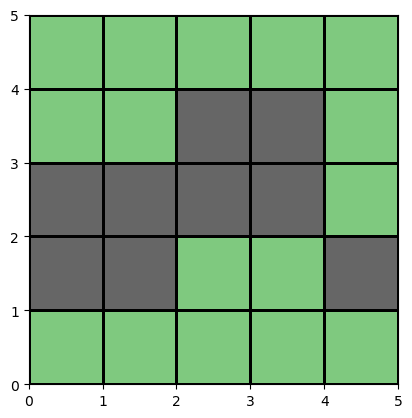

In [57]:
import matplotlib.pyplot as plt

plt.pcolormesh(data, edgecolors='k', linewidth=2, cmap='Accent')
ax = plt.gca()
ax.set_aspect('equal')

In [3]:

sim = fds.Simulation(
    r"./testing_data/test_data/out_crop_circles_cat.smv")

def get_slice_data(sim, qty):
    # get slice data arrays for each individual mesh
    data = []
    coords = []
    times = []

    for slice in sim.slices:
        if str(slice.quantity.name) == qty:
            # Creates a global numpy ndarray from all subslices (of the slice)
            # xyz is the returned matching coordinate for each value on the generated grid (data).
            # can return large sparse arrays for some slices
            slice_data, slice_coords = slice.to_global(
                return_coordinates=True, masked=True)
            # times for each slice
            slice_times = slice.times

            data.append(slice_data)
            coords.append(slice_coords)
            times.append(slice_times)
            break

    return data

hrr_array = get_slice_data(sim, "HRRPUV")
mass_flux_array = get_slice_data(sim, "MASS FLUX")




In [4]:
np.array(hrr_array).shape


(1, 337, 120, 300)

In [8]:
hrr_array = []

for slice in sim.slices:
    if slice.quantity.name == 'HRRPUV':
        hrr_array.append(slice.to_global(
                return_coordinates=True, masked=True))
        
print(f'hrr_array len: {len(hrr_array)}\n\n')

hrr_x = hrr_array[0][1]  # == hrr_array[0][1, :, :] # THIS IS TRUE


hrr_array

# print(f'HRR X:\n{hrr_x}\n\n')
# hrr_y = hrr_array[0][2]  # == hrr_array[0][2, :, :] # THIS IS TRUE
# print(f'HRR Y:\n{hrr_y}\n\n')

hrr_array len: 2




[(array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
  
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.0000

In [570]:
import numpy as np

# Set a seed for reproducibility (optional)
np.random.seed(42)

# Create a random array of integers
random_array = np.array(np.random.randint(low=0, high=10, size=(3, 4, 5)))

# Display the array
print(random_array)

array = np.array([[[6, 3, 7, 4, 6, 9, 2, 6],
                   [7, 4, 3, 7, 7, 2, 5, 4],
                   [1, 7, 5, 1, 4, 0, 9, 5],
                   [8, 0, 9, 2, 6, 3, 8, 2],
                   [4, 2, 6, 4, 8, 6, 1, 3],
                   [8, 1, 9, 8, 9, 4, 1, 3]],

                  [[6, 7, 2, 0, 3, 1, 7, 3],
                   [1, 5, 5, 9, 3, 5, 1, 9],
                   [1, 9, 3, 7, 6, 8, 7, 4],
                   [1, 4, 7, 9, 8, 8, 0, 8],
                   [6, 8, 7, 0, 7, 7, 2, 0],
                   [7, 2, 2, 0, 4, 9, 6, 9]],

                  [[8, 6, 8, 7, 1, 0, 6, 6],
                   [7, 4, 2, 7, 5, 2, 0, 2],
                   [4, 2, 0, 4, 9, 6, 6, 8],
                   [9, 9, 2, 6, 0, 3, 3, 4],
                   [6, 6, 3, 6, 2, 5, 1, 9],
                   [8, 4, 5, 3, 9, 6, 8, 6]]])

print(array)


print(array.all() == random_array.all())


[[[6 3 7 4 6]
  [9 2 6 7 4]
  [3 7 7 2 5]
  [4 1 7 5 1]]

 [[4 0 9 5 8]
  [0 9 2 6 3]
  [8 2 4 2 6]
  [4 8 6 1 3]]

 [[8 1 9 8 9]
  [4 1 3 6 7]
  [2 0 3 1 7]
  [3 1 5 5 9]]]
[[[6 3 7 4 6 9 2 6]
  [7 4 3 7 7 2 5 4]
  [1 7 5 1 4 0 9 5]
  [8 0 9 2 6 3 8 2]
  [4 2 6 4 8 6 1 3]
  [8 1 9 8 9 4 1 3]]

 [[6 7 2 0 3 1 7 3]
  [1 5 5 9 3 5 1 9]
  [1 9 3 7 6 8 7 4]
  [1 4 7 9 8 8 0 8]
  [6 8 7 0 7 7 2 0]
  [7 2 2 0 4 9 6 9]]

 [[8 6 8 7 1 0 6 6]
  [7 4 2 7 5 2 0 2]
  [4 2 0 4 9 6 6 8]
  [9 9 2 6 0 3 3 4]
  [6 6 3 6 2 5 1 9]
  [8 4 5 3 9 6 8 6]]]
True


In [572]:

# target array (3, 4, 5)
target_array = np.array([[[6, 3, 7, 4, 6],
                        [9, 2, 6, 7, 4],
                        [3, 7, 7, 2, 5],
                        [4, 1, 7, 5, 1]],

                        [[4, 0, 9, 5, 8],
                        [0, 9, 2, 6, 3],
                        [8, 2, 4, 2, 6],
                        [4, 8, 6, 1, 3]],

                        [[8, 1, 9, 8, 9],
                        [4, 1, 3, 6, 7],
                        [2, 0, 3, 1, 7],
                        [3, 1, 5, 5, 9]]])

test_array_1 = np.array([[[6, 3, 7, 4, 6],
                        [9, 2, 6, 7, 4],
                        [3, 7, 7, 2, 5],
                        [4, 1, 7, 5, 1]],

                        [[4, 0, 9, 5, 8],
                        [0, 9, 2, 6, 3]],

                        [[8, 1, 9, 8, 9],
                        [4, 1, 3, 6, 7],
                        [2, 0, 3, 1, 7],
                        [3, 1, 5, 5, 9]]])

test_array_2 = np.array([[[6, 3, 7, 4, 6],
                        [9, 2, 6, 7, 4],
                        [3, 7, 7, 2, 5],
                        [4, 1, 7, 5, 1]],

                        [[8, 2, 4, 2, 6],
                        [4, 8, 6, 1, 3]],

                        [[8, 1, 9, 8, 9],
                        [4, 1, 3, 6, 7],
                        [2, 0, 3, 1, 7],
                        [3, 1, 5, 5, 9]]])

# data_array = [arr for arr in [test_array_1, test_array_2]]
# # concatenate time, x, and y
# # TODO: reflect this in docstring?
# stitched_data = np.concatenate([arr[:, :, :]
#                             for arr in data_array], axis=1)

# print(stitched_data)
print(target_array.shape)
print(test_array_1.shape)
print(test_array_2.shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [573]:
import numpy as np

array = np.array([[[6, 3, 7, 4, 6],
                   [9, 2, 6, 7, 4],
                   [3, 7, 7, 2, 5],
                   [4, 1, 7, 5, 1]],

                  [[4, 0, 9, 5, 8],
                   [0, 9, 2, 6, 3]],

                  [[8, 1, 9, 8, 9],
                   [4, 1, 3, 6, 7],
                   [2, 0, 3, 1, 7],
                   [3, 1, 5, 5, 9]]])

print(array.shape)  # Output: (3, 4, 5)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [576]:
meshes = []
for mesh in sim.meshes:
    meshes.append(mesh.get_boundary_data(quantity="TOTAL HEAT FLUX"))

meshes


[Boundary(Quantity=Quantity('TOTAL HEAT FLUX'), Patches=1),
 Boundary(Quantity=Quantity('TOTAL HEAT FLUX'), Patches=1),
 Boundary(Quantity=Quantity('TOTAL HEAT FLUX'), Patches=1)]

In [577]:
for mesh in sim.meshes:
    print(mesh)

Mesh(id="MESH_0000001", extent=Extent([-6.00, -2.00] x [-18.00, 12.00] x [0.00, 10.00]), dimension=Dimension(41, 301, 101))
Mesh(id="MESH_0000002", extent=Extent([-2.00, 2.00] x [-18.00, 12.00] x [0.00, 10.00]), dimension=Dimension(41, 301, 101))
Mesh(id="MESH_0000003", extent=Extent([2.00, 6.00] x [-18.00, 12.00] x [0.00, 10.00]), dimension=Dimension(41, 301, 101))


In [579]:
import numpy as np

# Original array (3, 4, 5)
original_array = np.array([[[1, 2, 3, 4, 5],
                            [6, 7, 8, 9, 10],
                            [11, 12, 13, 14, 15],
                            [16, 17, 18, 19, 20]],

                           [[21, 22, 23, 24, 25],
                            [26, 27, 28, 29, 30],
                            [31, 32, 33, 34, 35],
                            [36, 37, 38, 39, 40]],

                           [[41, 42, 43, 44, 45],
                            [46, 47, 48, 49, 50],
                            [51, 52, 53, 54, 55],
                            [56, 57, 58, 59, 60]]])

# Create two (3, 2, 5) arrays
array1 = original_array[:, :2, :]
array2 = original_array[:, 2:4, :]

print("Original Array:")
print(original_array.shape)
print("\nArray 1:")
print(array1.shape)
print("\nArray 2:")
print(array2.shape)


Original Array:
(3, 4, 5)

Array 1:
(3, 2, 5)

Array 2:
(3, 2, 5)
